<a href="https://colab.research.google.com/github/kerryqliu/stats170/blob/kerry/Pres1_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk
import re
from sqlalchemy import create_engine
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
test = "Hello my name is 5\n5"
# test = re.sub(r'\n', '', test)
print(re.sub(r'[^\w\-\/+-]+', '', test))

Hellomynameis55


In [ ]:
# Do some cleaning of the data

text = "God is Great! I won a lottery."
temp = word_tokenize(text)
for i in range(len(temp)):
  temp[i] = re.sub(r'[^\w\-\/+-]+', '', temp[i])
print(list(filter(lambda x: len(x) > 0, temp)))

['God', 'is', 'Great', 'I', 'won', 'a', 'lottery']


# Extracting the rows from table

In [ ]:
from sqlalchemy import create_engine

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
testQuery = "SELECT * from docSentences d join sentenceLabels l on d.docid = l.docid and d.sentencenum = l.sentencenum;"
docs = pd.read_sql_query(testQuery, con=engine)
docs

,docid,sentencenum,sentence,docid,sentencenum,label
0,1.0,1.0,Document Text: Example 1\nReferring Doctor: Un...,1.0,1.0,0.0
1,1.0,2.0,He noted trouble Dorsey and plantar flexing th...,1.0,2.0,1.0
2,1.0,3.0,This presented without pain numbness or parest...,1.0,3.0,1.0
3,1.0,4.0,He also noted some\nweakness of his left hip a...,1.0,4.0,1.0
4,1.0,5.0,In he states mentions someone spike does drink...,1.0,5.0,0.0
...,...,...,...,...,...,...
5145,74.0,10.0,>10.0\nWrist 5th Digit\n13.0\nLower Sensory Su...,74.0,10.0,0.0
5146,74.0,11.0,JVDIV.,74.0,11.0,0.0
5147,74.0,12.0,2 ms/y 200 UVIDIY\n3 mo/DV\n(NCV (Right Paroni...,74.0,12.0,0.0
5148,74.0,13.0,NCV (Right Uiner Upper Sensory!,74.0,13.0,0.0


In [ ]:
docs[docs['label'] == 2.0]

,docid,sentencenum,sentence,docid,sentencenum,label
9,1.0,10.0,He did not note\nany weakness or impaired dext...,1.0,10.0,2.0
10,1.0,11.0,He felt the right leg was strong\nThere was no...,1.0,11.0,2.0
18,1.0,19.0,He has no past surgical history on file.,1.0,19.0,2.0
25,1.0,26.0,No masses.,1.0,26.0,2.0
40,1.0,41.0,Rubbed fingers\nequal.,1.0,41.0,2.0
...,...,...,...,...,...,...
4880,70.0,25.0,GAIT: Galt is normal with a narrow base and sh...,70.0,25.0,2.0
4881,70.0,26.0,REFLEXES: Deep tendon relexes are 2 over 4 tho...,70.0,26.0,2.0
4883,70.0,28.0,CEREBELLAR/COORDINATION: Finger to nose rapid ...,70.0,28.0,2.0
4887,70.0,32.0,Vibration is appreciated at the knee.,70.0,32.0,2.0


# tf-idf vectorization

In [ ]:
lemmatizer = WordNetLemmatizer()
print("rocks :", lemmatizer.lemmatize("rocks"))

rocks : rock


In [ ]:
def test_tokenizer(text):
  text = re.sub(r'\n', ' ', text)
  text = re.sub("\s\s+" , " ", text)
  text.replace("'", "")
  text = re.sub(r'[.\'*\']+', '', text)
  tokens = word_tokenize(text)
  return list(filter(lambda x: len(x) > 1, map(lambda x: lemmatizer.lemmatize(x), tokens)))

In [ ]:
corpus = []
tags = []
for i, row in docs.iterrows():
  corpus.append(row['sentence'])
  tags.append(row['label'])
  

In [ ]:
# Don't need special tokenizer for now maybe
vectorizer = TfidfVectorizer(stop_words = stopwords.words('english'))
test_docs = vectorizer.fit_transform(corpus)

In [ ]:
vocabulary = vectorizer.get_feature_names()
pd.DataFrame(data=test_docs.toarray(), columns=vocabulary)

,00,000,000000,00000000,0002,0003,0006611,001,0015,002,0021,003,003216,004,0044700,005,006,007,008,009,00am,00pm,01,010,011,012,01234,013,014,015,016,01605,0167,017,02,025,026,02apr2012,03,033,...,zem,zetla,zg,zidp,zigg,zinc,zion,zip,zipsor,zithromax,zlp,zofran,zoloft,zolpidem,zoo,zoran,zoster,zyrtec,µv,µvdv,¹4610,ákwe,álts,ályaago,áá,áádóó,éhl,íankle,ígíij,ísigo,înr,ølb,øzv,üle,ülnar,č5,ştimulus,μv,не,х2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.161892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.149218,0.0,0.0
5148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [ ]:
len(tags)

5150

In [ ]:
test_docs.shape

(5150, 8789)

# Dimensionality Reduction

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# second compress to two dimensions
svd = TruncatedSVD(n_components=2).fit(test_docs)
reduced = svd.transform(test_docs)

In [ ]:
reduced[:10]

array([[0.03535963, 0.01444559],
       [0.00478305, 0.00306512],
       [0.01616011, 0.02266967],
       [0.01638051, 0.01592858],
       [0.00071336, 0.0006311 ],
       [0.01722269, 0.02307443],
       [0.0085634 , 0.00451023],
       [0.00641484, 0.00549919],
       [0.00225423, 0.00140461],
       [0.00836557, 0.00893955]])

In [ ]:
colormapping = {0.0: "#7F59FF", 1.0: "green", 2.0: "red", 3.0: "black", 4.0: "black"}
legend = {0.0: "Unrelated", 1.0: "Reduced", 2.0: "Normal", 3.0: "Increased Legs", 4.0: "Increased Arms/Legs"}

In [ ]:
unrelated = []
low = []
normal = []
high = []
black_ct = 0
for index, instance in enumerate(reduced):
  pca_comp_1, pca_comp_2 = reduced[index]
  if (tags[index] == 0.0):
    if black_ct == 10:
      unrelated.append([pca_comp_1, pca_comp_2])
      black_ct = 0
    black_ct += 1
  elif (tags[index] == 1.0):
    low.append([pca_comp_1, pca_comp_2])
  elif (tags[index] == 2.0):
    normal.append([pca_comp_1, pca_comp_2])
  else:
    high.append([pca_comp_1, pca_comp_2])

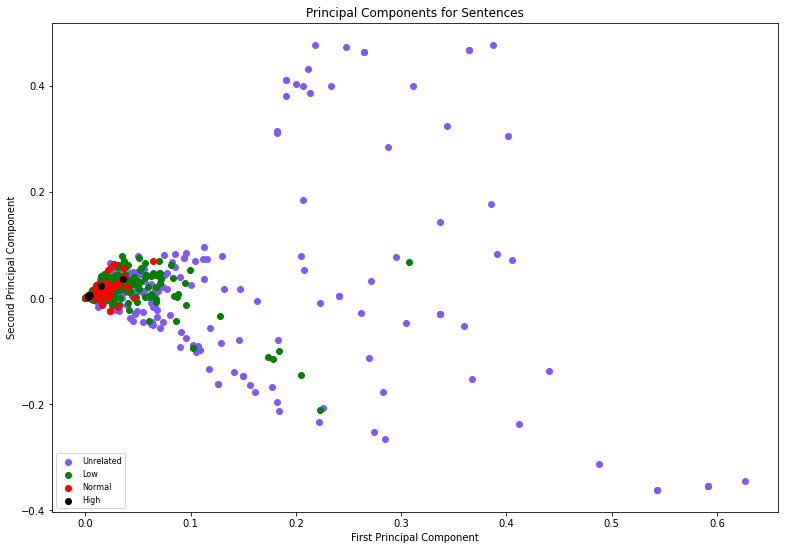

In [ ]:
fig, ax = plt.subplots(figsize=(13,9))

unrelated_plt = plt.scatter([i[0] for i in unrelated], [i[1] for i in unrelated], color = colormapping[0.0])
low_plt = plt.scatter([i[0] for i in low], [i[1] for i in low], color = colormapping[1.0])
normal_plt = plt.scatter([i[0] for i in normal], [i[1] for i in normal], color = colormapping[2.0])
high_plt = plt.scatter([i[0] for i in high], [i[1] for i in high], color = colormapping[3.0])

plt.title("Principal Components for Sentences")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend((unrelated_plt, low_plt, normal_plt, high_plt),
           ('Unrelated', 'Low', 'Normal', 'High'),
           scatterpoints=1,
           loc='lower left',
           fontsize=8)
plt.show()

# Full Documents

In [ ]:
query2 = "SELECT * from fullDocuments f join documentLabels d on f.docid = d.docid;"
fulldocs = pd.read_sql_query(query2, con=engine)
fulldocs

,docid,fulltext,docid,caseid,label
0,1.0,Document Text: Example 1\nReferring Doctor: Un...,1,-1,1.0
1,2.0,Document Text: Example 2\nProgress Notes\nDate...,2,-1,1.0
2,3.0,Document Text: Example 3\nChief Complaint:\n1....,3,-1,4.0
3,4.0,Document Text: 14\nse\nLAIDA\n*\nPatient Infor...,4,11594,1.0
4,5.0,Document Text: The first set of documents behi...,5,11594,1.0
...,...,...,...,...,...
110,111.0,Document Text: 9:10\nFAX\n2002/041\n'\nPatient...,111,87832,1.0
111,112.0,Document Text: # 23/24\nfined VI\nvyy\nScan on...,112,88178,1.0
112,113.0,Document Text: 15:03 From\nPage: 1/24\nNUFACTO...,113,95139,1.0
113,114.0,Document Text: 03:58:42 p.m.\n1/2\nNU FACTOR\n...,114,95739,2.0


In [ ]:
corpus = []
tags = []
for i, row in fulldocs.iterrows():
  corpus.append(row['fulltext'])
  tags.append(row['label'])

In [ ]:
vectorizer2 = TfidfVectorizer(stop_words = stopwords.words('english'))
test_fulldocs = vectorizer2.fit_transform(corpus)

In [ ]:
svd = TruncatedSVD(n_components=2).fit(test_fulldocs)
reduced = svd.transform(test_fulldocs)

In [ ]:
unrelated = []
low = []
normal = []
high = []
for index, instance in enumerate(reduced):
  pca_comp_1, pca_comp_2 = reduced[index]
  if (tags[index] == 0.0):
    unrelated.append([pca_comp_1, pca_comp_2])
  elif (tags[index] == 1.0):
    low.append([pca_comp_1, pca_comp_2])
  elif (tags[index] == 2.0):
    normal.append([pca_comp_1, pca_comp_2])
  else:
    high.append([pca_comp_1, pca_comp_2])

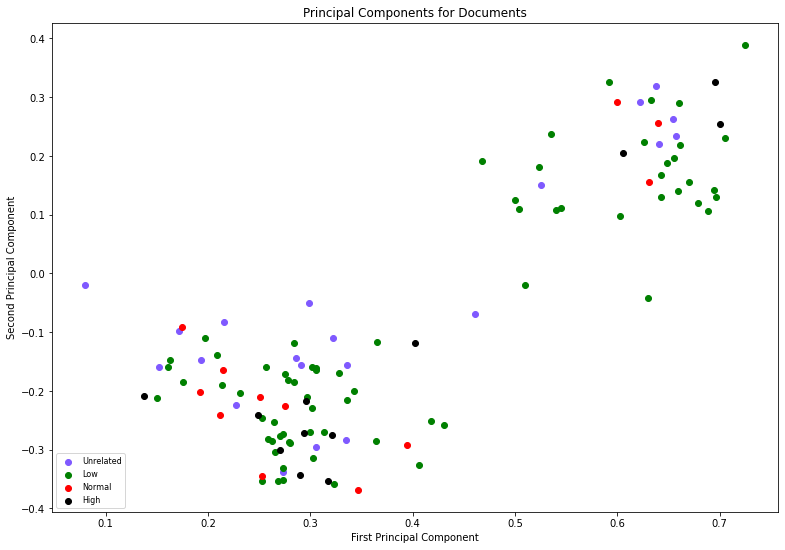

In [ ]:
fig, ax = plt.subplots(figsize=(13,9))

unrelated_plt = plt.scatter([i[0] for i in unrelated], [i[1] for i in unrelated], color = colormapping[0.0])
low_plt = plt.scatter([i[0] for i in low], [i[1] for i in low], color = colormapping[1.0])
normal_plt = plt.scatter([i[0] for i in normal], [i[1] for i in normal], color = colormapping[2.0])
high_plt = plt.scatter([i[0] for i in high], [i[1] for i in high], color = colormapping[3.0])

plt.title("Principal Components for Documents")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend((unrelated_plt, low_plt, normal_plt, high_plt),
           ('Unrelated', 'Low', 'Normal', 'High'),
           scatterpoints=1,
           loc='lower left',
           fontsize=8)
plt.show()

# Simple test

In [ ]:
corpus = [
    "This is my first email bob.",
    "I'm trying to learn machine learning.",
    "This is the second email",
    "Learning is fun"
]

vectorizer = TfidfVectorizer(tokenizer=test_tokenizer)
X = vectorizer.fit_transform(corpus)
print(X.toarray())

[[0.46370919 0.36559366 0.46370919 0.         0.         0.29597957
  0.         0.         0.         0.46370919 0.         0.
  0.36559366 0.         0.        ]
 [0.         0.         0.         0.         0.42176478 0.
  0.42176478 0.3325242  0.42176478 0.         0.         0.
  0.         0.42176478 0.42176478]
 [0.         0.41263976 0.         0.         0.         0.33406745
  0.         0.         0.         0.         0.52338122 0.52338122
  0.41263976 0.         0.        ]
 [0.         0.         0.         0.70203482 0.         0.44809973
  0.         0.55349232 0.         0.         0.         0.
  0.         0.         0.        ]]


In [ ]:
test_tokenizer(corpus[0])

['This', 'is', 'my', 'first', 'email', 'bob']

In [ ]:
vocabulary = vectorizer.get_feature_names()
pd.DataFrame(data=X.toarray(), columns=vocabulary)

,bob,email,first,fun,im,is,learn,learning,machine,my,second,the,this,to,trying
0,0.463709,0.365594,0.463709,0.000000,0.000000,0.295980,0.000000,0.000000,0.000000,0.463709,0.000000,0.000000,0.365594,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.421765,0.000000,0.421765,0.332524,0.421765,0.000000,0.000000,0.000000,0.000000,0.421765,0.421765
2,0.000000,0.412640,0.000000,0.000000,0.000000,0.334067,0.000000,0.000000,0.000000,0.000000,0.523381,0.523381,0.412640,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.702035,0.000000,0.448100,0.000000,0.553492,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
word_tokenize("my name is 5/5+")

['my', 'name', 'is', '5/5+']

In [ ]:
test = "Hi there my name is      joe"
re.sub("\s\s+" , " ", test)

'Hi there my name is joe'